In [51]:
import time
import json
import gzip
import random
from tqdm import tqdm
from pytrends.request import TrendReq
from pytrends.exceptions import ResponseError
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import sys
import numpy as np

from rake_nltk import Rake

In [52]:
i = 0
list_of_q = []
with gzip.open('nq.jsonl.gz') as f:
    for line in tqdm(f):
        list_of_q.append(line)
        i += 1

7830it [00:18, 432.78it/s]


In [7]:
l = list_of_q[30]
x = json.loads(l)

dict_keys(['annotations', 'document_html', 'document_title', 'document_tokens', 'document_url', 'example_id', 'long_answer_candidates', 'question_text', 'question_tokens'])

<!DOCTYPE html>
<HTML class="client-js ve-not-available" lang="en" dir="ltr"><HEAD>

<TITLE>Lake Eyre - Wikipedia</TITLE>


<LINK rel="stylesheet" href="/w/load.php?debug=false&amp;lang=en&amp;modules=ext.cite.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.sectionAnchor%7Cmediawiki.skinning.interface%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" />

<STYLE>
.referencetooltip{position:absolute;list-style:none;list-style-image:none;opacity:0;font-size:12px;margin:0;z-index:5;padding:0}.referencetooltip > li{background:#fff;border:1px solid #bbb;-webkit-box-shadow:0 0 10px rgba(0,0,0,0.2);-moz-box-shadow:0 0 10px rgba(0,0,0,0.2);box-shadow:0 0 10px rgba(0,0,0,0.2);margin:0;padding:8px 10px;line-height:18px;max-width:300px}.referencetooltip > li + li{box-sizing:border-box;margin-left:7px;margin-top:-1px;border:0;padding:0;height:3px;width:0;background-c
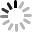

In [10]:
display(x.keys())
print(x['document_html'])

In [9]:
[y['token'] for y in x['document_tokens']]

['Lake',
 'Eyre',
 '-',
 'Wikipedia',
 '<H1>',
 'Lake',
 'Eyre',
 '</H1>',
 'Jump',
 'to',
 ':',
 'navigation',
 ',',
 'search',
 'This',
 'article',
 'is',
 'about',
 'the',
 'lake',
 'in',
 'South',
 'Australia',
 '.',
 'For',
 'the',
 'associated',
 'locality',
 ',',
 'see',
 'Lake',
 'Eyre',
 ',',
 'South',
 'Australia',
 '.',
 '<Table>',
 '<Tr>',
 '<Th colspan="2">',
 'Kati',
 'Thanda',
 '--',
 'Lake',
 'Eyre',
 '</Th>',
 '</Tr>',
 '<Tr>',
 '<Td colspan="2">',
 'Composite',
 'Landsat',
 '7',
 'satellite',
 'image',
 'using',
 'shortwave',
 'infrared',
 ',',
 'near',
 '-',
 'infrared',
 ',',
 'and',
 'blue',
 'wavelengths',
 '</Td>',
 '</Tr>',
 '<Tr>',
 '<Td colspan="2">',
 'A',
 'map',
 'of',
 'the',
 'Lake',
 'Eyre',
 'basin',
 ',',
 'with',
 'the',
 'lake',
 'at',
 'bottom',
 'left',
 '</Td>',
 '</Tr>',
 '<Tr>',
 '<Th>',
 'Location',
 '</Th>',
 '<Td>',
 'Northern',
 'South',
 'Australia',
 '</Td>',
 '</Tr>',
 '<Tr>',
 '<Th>',
 'Coordinates',
 '</Th>',
 '<Td>',
 '28',
 '°',
 '22'

In [119]:
x['annotations']

[{'annotation_id': 5652942812737956535,
  'long_answer': {'candidate_index': -1,
   'end_byte': -1,
   'end_token': -1,
   'start_byte': -1,
   'start_token': -1},
  'short_answers': [],
  'yes_no_answer': 'NONE'},
 {'annotation_id': 7508345935899274474,
  'long_answer': {'candidate_index': -1,
   'end_byte': -1,
   'end_token': -1,
   'start_byte': -1,
   'start_token': -1},
  'short_answers': [],
  'yes_no_answer': 'NONE'},
 {'annotation_id': 4780625526650654850,
  'long_answer': {'candidate_index': -1,
   'end_byte': -1,
   'end_token': -1,
   'start_byte': -1,
   'start_token': -1},
  'short_answers': [],
  'yes_no_answer': 'NONE'},
 {'annotation_id': 13347808338101537992,
  'long_answer': {'candidate_index': -1,
   'end_byte': -1,
   'end_token': -1,
   'start_byte': -1,
   'start_token': -1},
  'short_answers': [],
  'yes_no_answer': 'NONE'},
 {'annotation_id': 15961978642434181346,
  'long_answer': {'candidate_index': -1,
   'end_byte': -1,
   'end_token': -1,
   'start_byte': -

In [120]:
answer = x['document_html'].encode('utf-8')[70812:70823].decode('utf-8')

In [122]:
kw_list = [answer]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [74]:
trend =pytrends.interest_over_time()

In [75]:
trend

""


In [123]:
r = Rake()
r.extract_keywords_from_text(x['question_text'])
kw_list = r.get_ranked_phrases()
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')

In [124]:
trend = pytrends.interest_over_time()

trend = trend - trend.mean()
trend = trend.drop(['isPartial'], axis=1)

<AxesSubplot:xlabel='date'>

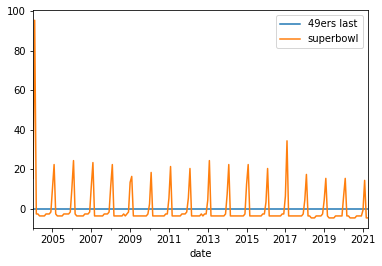

In [125]:
trend.plot()

In [13]:
def get_short_answers(question):
    answers = set()
    for annotation in question['annotations']:
        if len(annotation['short_answers']) != 0:
            short_answer = annotation['short_answers'][0]
            answer = question['document_html'].encode('utf-8')[short_answer['start_byte']:short_answer['end_byte']].decode('utf-8')
            answers.add(answer)
    return list(answers)
            
            
print(json.loads(l)['annotations'][0]['short_answers'])
print(get_short_answer(json.loads(l)))

[{'end_byte': 59126, 'end_token': 170, 'start_byte': 59111, 'start_token': 168}]


NameError: name 'get_short_answer' is not defined

In [53]:
def get_trend(question, normalize=False):
    pytrends = TrendReq(hl='en-US', tz=300, retries=100, backoff_factor=120, requests_args={'verify':True})
    short_answers = get_short_answers(question)
    r = Rake()
    r.extract_keywords_from_text(question['question_text'])
    
    question_keywords = r.get_ranked_phrases()
    

    # Get trend data of answers and question keywords
    try:
        pytrends.build_payload(short_answers, cat=0, timeframe='all', geo='', gprop='')
        answer_trends = pytrends.interest_over_time()
    except ResponseError as e:
        print(e.response.status_code)
        if (e.response.status_code == 429):
            time.sleep(600)
        return df(), df()
    
    

    
    try:
        pytrends.build_payload(question_keywords, cat=0, timeframe='all', geo='', gprop='')
        question_trends = pytrends.interest_over_time()
    except ResponseError as e:
        print(e.response)
        if (e.response.status_code == 429):
            time.sleep(600)
        return df(), df()
            
    
    if normalize:
        if 'isPartial' in answer_trends.columns:
            answer_trends = answer_trends.drop(['isPartial'], axis=1)
        if 'isPartial' in question_trends.columns:    
            question_trends =question_trends.drop(['isPartial'], axis=1)
        answer_trends = answer_trends - answer_trends.mean()
        question_trends = question_trends - question_trends.mean()
    
    
    return question_trends, answer_trends
    

In [26]:
a.plot()

NameError: name 'a' is not defined

In [27]:
combined = q.merge(a, left_on='date', right_on='date')

NameError: name 'q' is not defined

In [28]:
combined.corr()['Scarlett Johansson'][:-1].max()

NameError: name 'combined' is not defined

In [29]:
overall_pearson_r = combined.corr().iloc[0,2]

f,ax=plt.subplots(figsize=(7,3))
display(combined['Tamara Drasin'].rolling(window=1,center=True).corr(combined['eyes first']))
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

NameError: name 'combined' is not defined

In [56]:
texts = []
correlations = []

In [59]:
def get_maximum_correlations(list_of_questions, start_index=0):   
    i = 0
    for question_idx in tqdm(range(start_index, len(list_of_questions))):
        question = list_of_questions[question_idx]
        if i % 50 == 49:
            time.sleep(random.randrange(30,60))
        question = json.loads(question)
        short_answers = get_short_answers(question)
        if len(short_answers) != 0:
            question_trend, answer_trend = get_trend(question, normalize=True)
            
            if not answer_trend.empty and not question_trend.empty:
                #display(answer_trend)
                combined = question_trend.merge(answer_trend, left_on='date', right_on='date')
               # display(combined.corr())
                short_answer_corr = combined.corr().iloc[:-len(short_answers),-len(short_answers):]
                max_corr = np.nanmax(short_answer_corr)
                texts.append(question['question_text'])
                correlations.append(max_corr)
        i += 1
            
    return texts, correlations
t, c, = get_maximum_correlations(list_of_q)

    
    

  0%|          | 0/7830 [00:00<?, ?it/s]

429


  0%|          | 0/7830 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [41]:
df(list(zip(t,c)),columns=['Question', 'Max Correlation']).sort_values('Max Correlation')

NameError: name 't' is not defined